In [8]:
import boto3
import pandas as pd; pd.set_option('Display.max_columns',100)
import numpy as np

s3 = boto3.resource('s3')
bucket_name = 'christran-data445-bucket'
bucket = s3.Bucket(bucket_name)

file_key ='Real_Estate(2).csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

#read the data file 
house_price = pd.read_csv(file_content_stream)
house_price.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [9]:
house_price = house_price.drop(columns = ['No', 'transaction_date'], axis = 1)

In [10]:
house_price.head()

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [12]:
#import train_test_split function
from sklearn.model_selection import train_test_split

#defining input and target variables
X = house_price.drop(columns = 'house_price_of_unit_area', axis = 1)
Y = house_price['house_price_of_unit_area']


#splitting the data into training and testing 
X_train, X_test, Y_train, Y_test = train_test_split(X , Y , test_size = 0.2)

In [16]:
from sklearn.linear_model import LinearRegression

#building a simple linear regression model on the training dataset
lm_md = LinearRegression().fit(X_train, Y_train)

#applying the model on the testing dataset
lm_pred = lm_md.predict(X_test)
lm_pred

array([52.25483262, 49.47577865, 38.07991631, 43.75314259, 32.83473761,
       41.70349384, 12.69289895, 40.3259425 , 45.81055705, 31.06698886,
       30.94460069, 40.31677152, 15.42016406, 47.77324099, 47.1118396 ,
       35.45652996, 31.09739663, 29.8907872 , 43.35132487, 33.61483092,
       54.15840468, 41.94614093, 41.68659443, 48.11572986, 34.62903146,
       46.81700983, 38.01910076, 38.47341909, 42.00690469, 44.5511257 ,
       41.91573316, 50.24166448, 45.81771642, 29.82997164, 50.60289067,
       32.98677649, 47.25999441, 24.36804843, 41.2033271 , 42.25062951,
       30.45024599, 31.15821219, 49.94346464, 39.95745697, 24.30014522,
       41.59288189, 52.46768705, 33.40596311, 34.68964465, 28.61900549,
       35.38260414, 15.60692293, 33.19846904, 35.84027911, 30.29862041,
       31.83210846, 43.07692484, 34.82655205, 50.60289067, 47.74871528,
       47.07222927, 16.49650934, 33.25693291, 34.26578477, 51.4337161 ,
       34.26534408, 33.13676725, 45.06151534, 39.17792362, 39.53

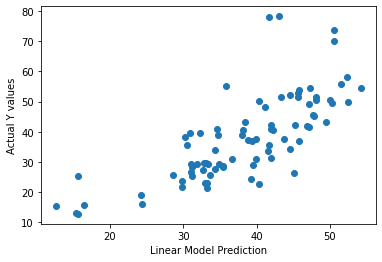

In [19]:
#comparing the model predictions against the actual values 
import matplotlib.pyplot as plt 

plt.scatter(lm_pred, Y_test)
plt.xlabel('Linear Model Prediction')
plt.ylabel('Actual Y values')
plt.show()

In [20]:
#computing MSE
np.mean((Y_test - lm_pred)**2)

89.31398399355224